<a href="https://colab.research.google.com/github/Tomokki/private_Python-.gitkeep/blob/main/Python_%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E6%B1%BA%E5%AE%9A%E6%9C%A8%E2%91%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pythonを用いた決定木（シングル、回帰）

####分析データの概要
* 分析データ「sin_samples.csv 」
* sin波形にノイズを付加したデータ

##データの読み込み
* 分析データに対して read_csv 関数 を実行
* 変数名は「df 」とする
* 分析データのデータクレンジングは不要

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("sin_samples.csv")
df.head()

,x,y
0,4.886138,0.368440
1,8.933951,-0.230160
2,5.091303,0.921387
3,8.846782,-1.097886
4,1.198032,0.555058


##データの可視化
* 読み込んだデータを可視化

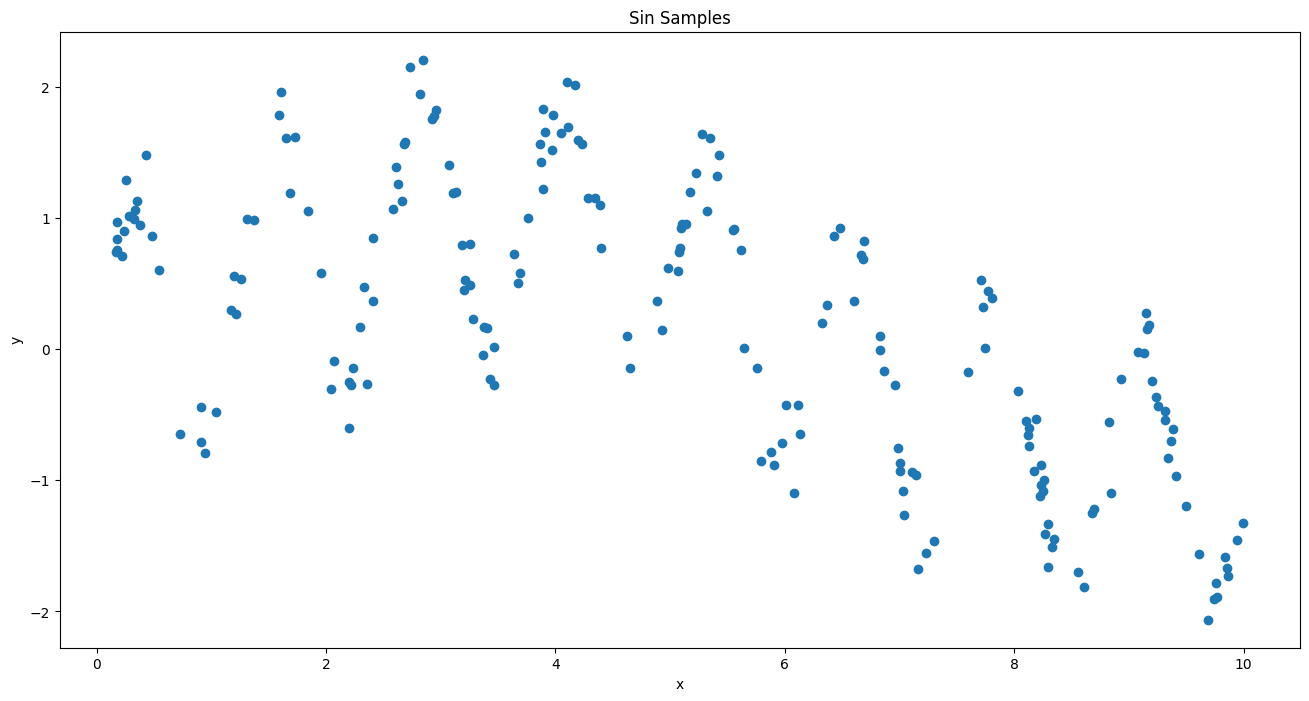

In [2]:
x = np.array(df["x"]).reshape(-1,1)
y = np.array(df["y"])

plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Sin Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##データの分割  
* データを学習用と検証用に分割

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size = 0.7, test_size = 0.3, random_state = 0
)

##決定木の学習モデルを作成
* DecisionTreeRegressorライブラリを用いて決定木のモデルを作成

In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf= 1,min_samples_split=2)
model.fit(x_train, y_train)



DecisionTreeRegressor(max_depth=5)

##決定木の学習モデルの可視化
* 決定木のツリーグラフをプロット

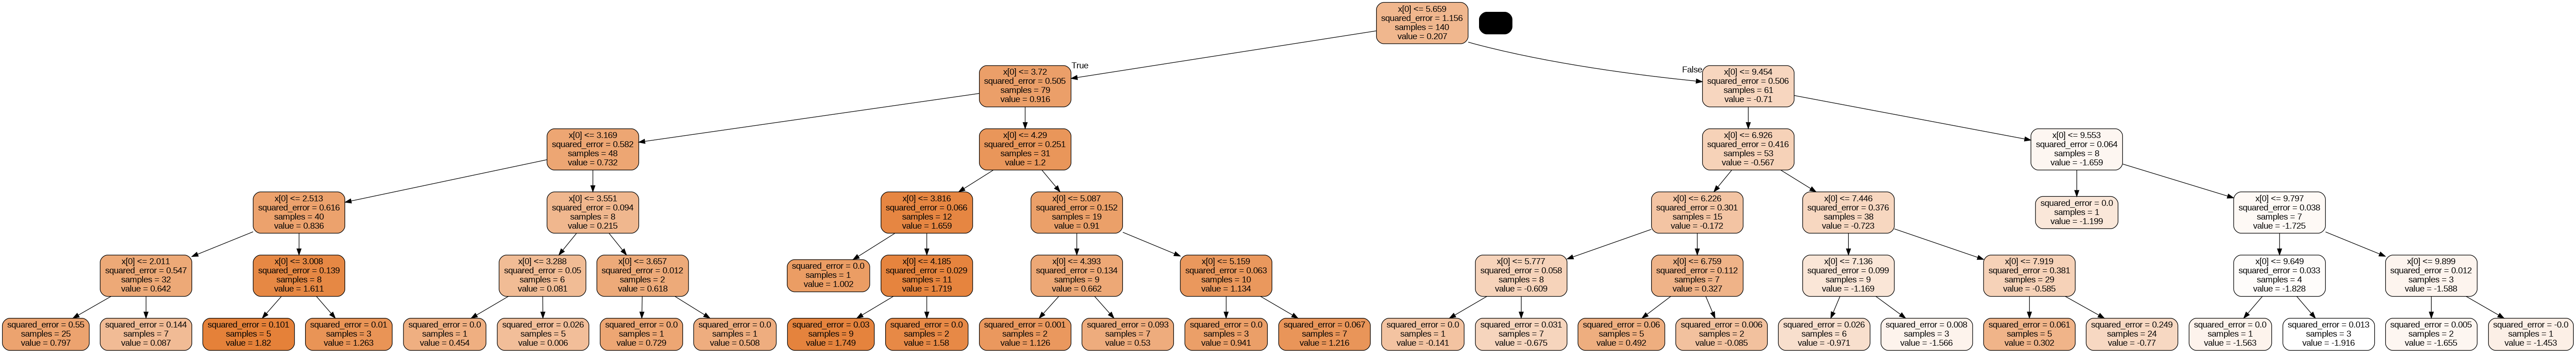

In [9]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##残差プロットの確認
* 残差のばらつきを見る残差分析を実施

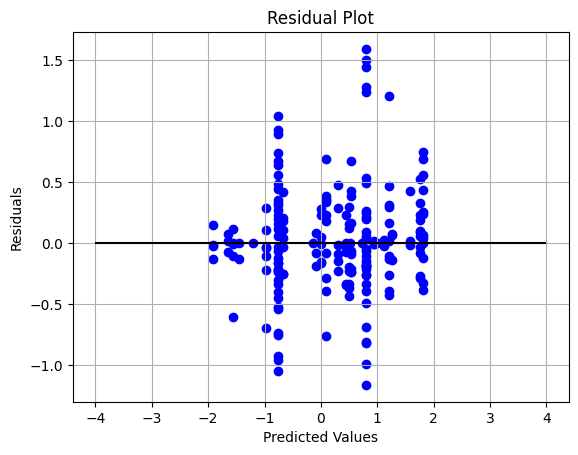

In [13]:
y_pred = model.predict(x)

plt.scatter(y_pred,y_pred-y,color="blue")
plt.hlines(y=0,xmin=-4,xmax=4,color="black")

plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

* 残差がy 軸「0 」の付近で均一に分散していることが望ましい
* 大きく外れている値は外れ値である可能性がある

##平均二乗誤差（MSE: Mean Square Error Error)
* 実際の値とモデルによる予測値との誤差の平均値
* モデルの残差が平均的にどのくらいかを表す指標
* MSEは低ければ低いほど良い

In [14]:
from sklearn.metrics import mean_squared_error
print("MSE:(train)", mean_squared_error(y_train,model.predict(x_train)))
print("MSE:(test)", mean_squared_error(y_test,model.predict(x_test)))

MSE:(train) 0.17036894975388586
MSE:(test) 0.22927827917287552


##決定係数𝑅^2
* 説明変数 が 目的変数 をどれくらい説明できているかを表す値
* モデルの残差が平均的にどのくらいかを表す指標
* 1に近いほど精度が良い
* 𝑅^2 が 0.6 以下 の回帰モデルは使い物にならない
* 𝑅^2 が 0.9 以上 の回帰モデルは過学習の可能性

In [15]:
from sklearn.metrics import r2_score
print("r^2(train):", r2_score(y_train,model.predict(x_train)))
print("r^2(test):", r2_score(y_test,model.predict(x_test)))

r^2(train): 0.8525612695497191
r^2(test): 0.7616783956030085


##予測結果の可視化
* 学習モデルによる予測結果のプロット

In [18]:
# 確認用に0～10の1000個のデータを用意
xfit = np.linspace(0,10,1000)

# 決定木実行
# 予測実行
yfit = model.predict(xfit[:, None])

# 結果比較用に実際の値を取得
def sin_model(x,sigma = 0.2):
  # 大きな波＋小さな波＋ノイズからなるダミーデータ
  noise = sigma * np.random.randn(len(x))
  return np.sin(5*x) + np.sin(0.5 * x) + noise

ytrue = sin_model(xfit,0)

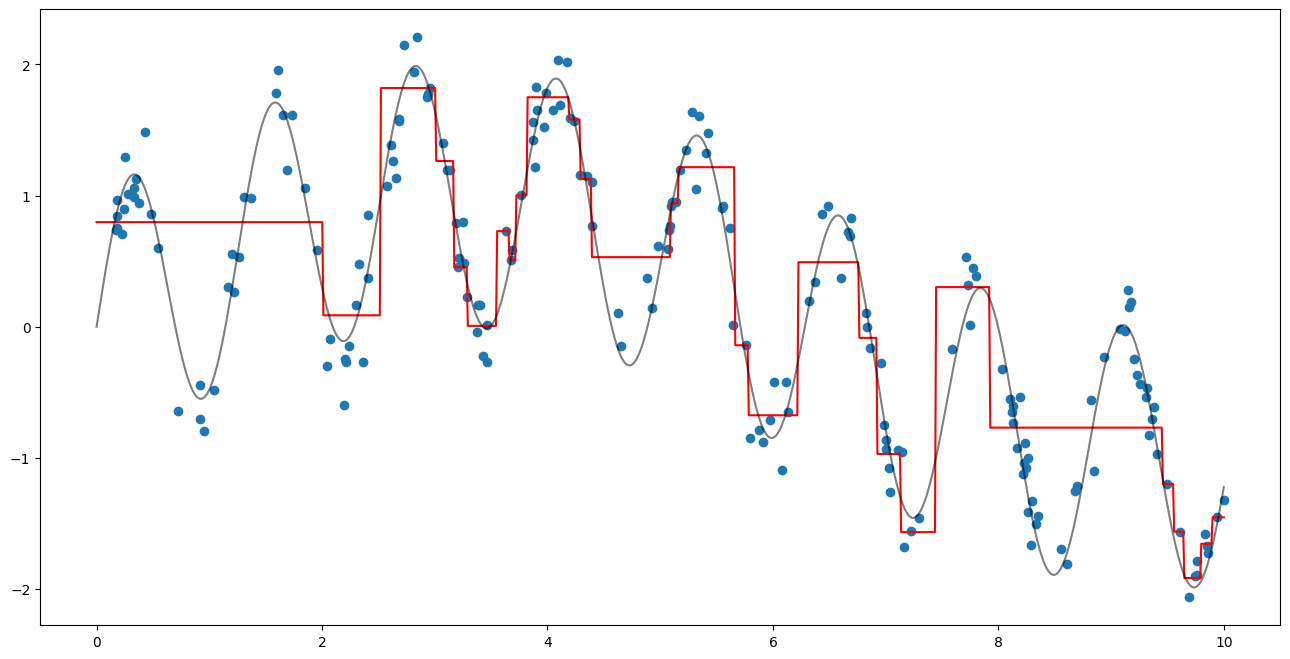

In [20]:
# 結果確認
plt.figure(figsize = (16,8))
plt.scatter(x,y)
# 予測値のPlot
plt.plot(xfit , yfit, "-r")
# 正解値のPlot
plt.plot(xfit , ytrue, "-k", alpha = 0.5)
plt.show()


#Pythonを用いたランダムフォレスト（バギング、回帰）

####分析データの概要
* 分析データ「sin_samples.csv 」
* sin波形にノイズを付加したデータ

##データの読み込み
* 分析データに対して read_csv 関数 を実行
* 変数名は「df 」とする
* 分析データのデータクレンジングは不要

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("sin_samples.csv")
df.head()

,x,y
0,4.886138,0.368440
1,8.933951,-0.230160
2,5.091303,0.921387
3,8.846782,-1.097886
4,1.198032,0.555058


##データの可視化
* 読み込んだデータを可視化

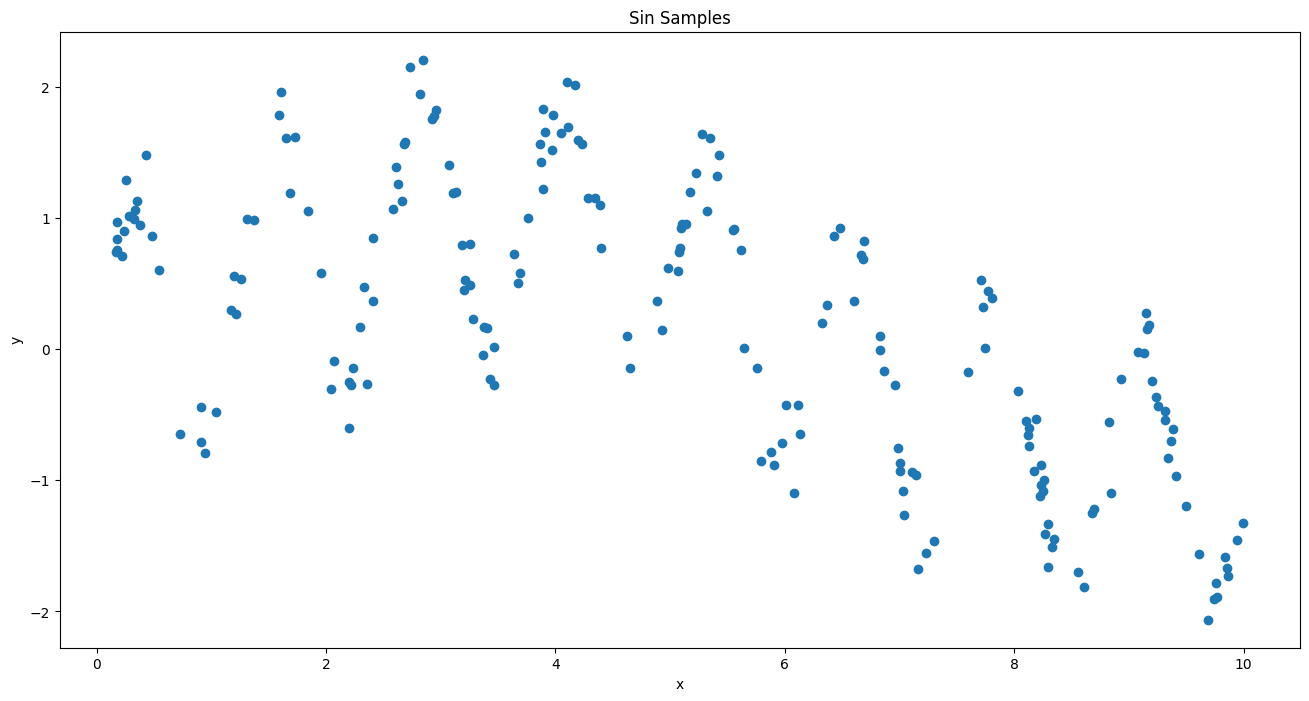

In [23]:
x = np.array(df["x"]).reshape(-1,1)
y = np.array(df["y"])

plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.title("Sin Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##データの分割  
* データを学習用と検証用に分割

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size = 0.7, test_size = 0.3, random_state = 0
)

##決定木の学習モデルを作成
* DecisionTreeRegressorライブラリを用いて決定木のモデルを作成

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state=0)
model.fit(x_train, y_train)



RandomForestRegressor(random_state=0)

##単一のランダムフォレストの学習モデルの可視化
* ランダムフォレストのツリーグラフをプロット

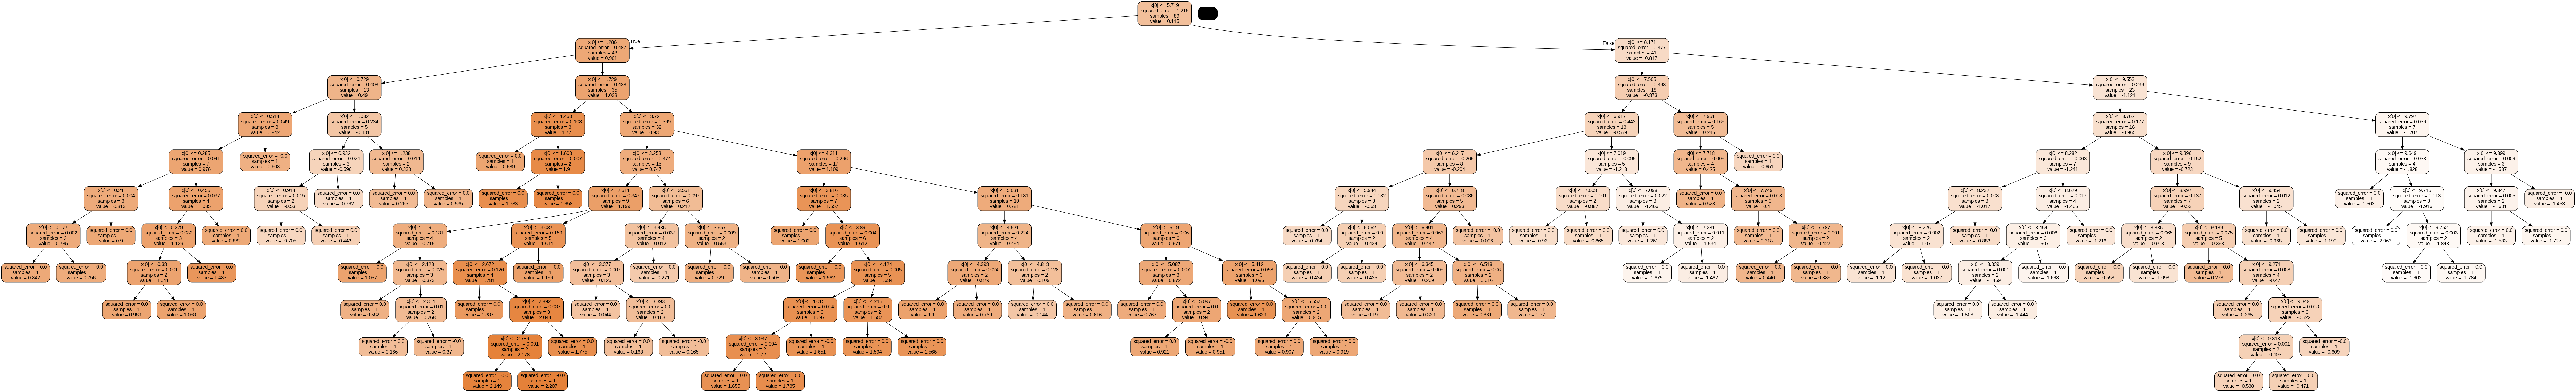

In [36]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model. estimators_[0], out_file=dot_data,
                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##複数のランダムフォレストの学習モデルの可視化
* ランダムフォレストのツリーグラフをプロット

In [38]:
# 決定木画像の保存先フォルダの作成
import os
output_dir = "/content/rf_c_tree"
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

# 決定木の可視化
  from sklearn.tree import export_graphviz
  import pydotplus
  from sklearn.externals.six import StringIO
  from IPython.display import Image

In [40]:
for i in range(len(model.estimators_)):
  dot_data = StringIO()
  export_graphviz(model.estimators_[i], out_file=dot_data,
                  filled=True,rounded=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(output_dir + "tree_" + str(i) + ".png")

In [41]:
# 決定木のルートノードの位置と画像サイズをそろえる
import glob
import os
import cv2
import numpy as np

path_list = glob.glob(output_dir + "*.png")
#指定されたディレクトリ内の.pngファイルを取得

h_list =[]         #全画像の高さサイズリスト初期化
w_list =[]         #全画像の幅サイズリスト初期化
root_w_list=[]     #全画像のルートノード幅リスト初期化
root_c_list=[]     #全画像のルートノード中心位置リスト初期化
img_list = []      #画像リスト初期化

In [42]:
for i in range(len(path_list)): #全画像のサイズとルート位置情報を取得するループ
  img = cv2.imread(path_list[i],1) #カラー画像として読み込み
  img_list.append(img)
  h,w,ch =img.shape[:3] #縦(h)横(w)画像サイズを取得
  h_list.append(h) #hをリストに追加
  w_list.append(w) #wをリストに追加

  img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #二値化のためのグレースケール化
  ret,i_binary = cv2.threshold(img_g, #二値化処理
                               250,   #閾値（この値以上が白）
                               255,   #画像の最大輝度値
                               cv2.THRESH_BINARY) #実行アルゴリズム（単純二値化）

  line = i_binary[50, :]   #ルートノードのボックス部分を横方向にスライス
  index = np.where(line==0) #0と一致する指標を検索
  index = np.array(list(index)).ravel() #1D配列化
  root_w = index[-1] - index[0] #ルートノードの幅
  root_c = int(index[0] + root_w/2) #ルートノードの幅方向中心座標
  root_w_list.append(root_w) #root_wをリストに追加
  root_c_list.append(root_c) #root_cをリストに追加


In [43]:
h_max = np.max(h_list) #全画像の中で最大高さを算出
w_max = np.max(root_c_list)*2 #背景画像のサイズを設定
size = h_max,w_max,3 #ルートノードが最も右にあるものを中心にする

for j in range(len(path_list)): #全画像のルートノード位置を補正するループ
  img_out = np.full(size,255) #出力するベース画像を白紙にする
  img_roi = img_list[j] #決定木画像（カラー）をリストから取り出す
  calibration = int((w_max / 2)- root_c_list[j]) #幅方向補正量

#ベースの白紙画像にルートノードで位置補正した決定木画像を貼り付ける
  img_out[0:h_list[j],calibration:calibration + w_list[j]] =img_roi

file = os.path.basename(path_list[j]) #拡張子ありファイル名を取得
name,ext = os.path.splitext(file) #拡張子なしファイル名と拡張子を取得
out_path = os.path.join(*[output_dir, name+ext]) #保存パスを作成
cv2.imwrite(out_path,img_out) #補正後の画像を保存



True

In [44]:
#GIFアニメ生成
!pip install -q imageio
import imageio
import glob

anim_file = "random_forest_c.gif"


In [45]:
with imageio.get_writer(anim_file,mode="I")as writer:
  filenames = glob.glob(output_dir + "*png")
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 5*(i**0.5)
    if round(frame)>round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


<ipython-input-45-e530253ae34e>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-45-e530253ae34e>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


##残差プロットの確認
* 残差のばらつきを見る残差分析を実施

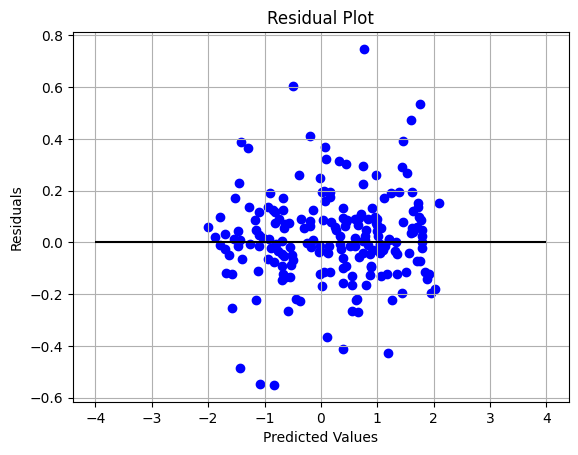

In [46]:
y_pred = model.predict(x)

plt.scatter(y_pred,y_pred-y,color="blue")
plt.hlines(y=0,xmin=-4,xmax=4,color="black")

plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

* 残差がy 軸「0 」の付近で均一に分散していることが望ましい
* 大きく外れている値は外れ値である可能性がある

##平均二乗誤差（MSE: Mean Square Error Error)
* 実際の値とモデルによる予測値との誤差の平均値
* モデルの残差が平均的にどのくらいかを表す指標
* MSEは低ければ低いほど良い

In [47]:
from sklearn.metrics import mean_squared_error
print("MSE:(train)", mean_squared_error(y_train,model.predict(x_train)))
print("MSE:(test)", mean_squared_error(y_test,model.predict(x_test)))

MSE:(train) 0.012001841832049866
MSE:(test) 0.07882708706157952


##決定係数𝑅^2
* 説明変数 が 目的変数 をどれくらい説明できているかを表す値
* モデルの残差が平均的にどのくらいかを表す指標
* 1に近いほど精度が良い
* 𝑅^2 が 0.6 以下 の回帰モデルは使い物にならない
* 𝑅^2 が 0.9 以上 の回帰モデルは過学習の可能性

In [48]:
from sklearn.metrics import r2_score
print("r^2(train):", r2_score(y_train,model.predict(x_train)))
print("r^2(test):", r2_score(y_test,model.predict(x_test)))

r^2(train): 0.98961350454212
r^2(test): 0.9180637698161883


##予測結果の可視化
* 学習モデルによる予測結果のプロット

In [49]:
# 確認用に0～10の1000個のデータを用意
xfit = np.linspace(0,10,1000)

# 決定木実行
# 予測実行
yfit = model.predict(xfit[:, None])

# 結果比較用に実際の値を取得
def sin_model(x,sigma = 0.2):
  # 大きな波＋小さな波＋ノイズからなるダミーデータ
  noise = sigma * np.random.randn(len(x))
  return np.sin(5*x) + np.sin(0.5 * x) + noise

ytrue = sin_model(xfit,0)

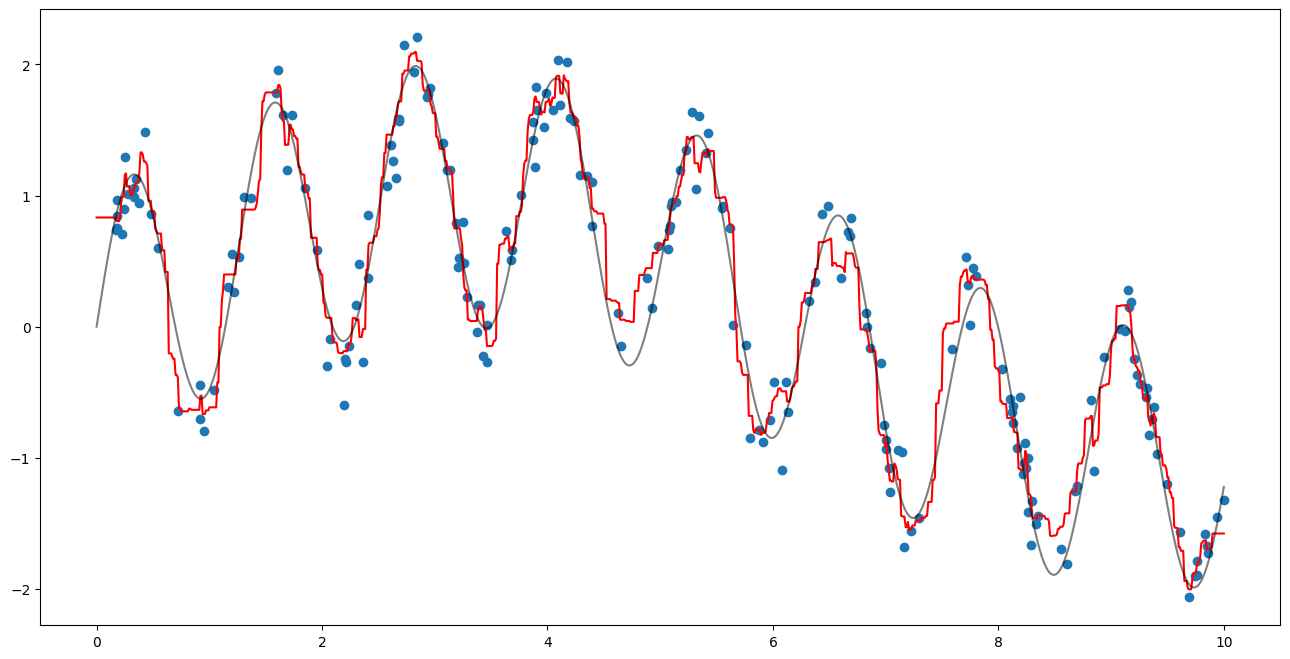

In [50]:
# 結果確認
plt.figure(figsize = (16,8))
plt.scatter(x,y)
# 予測値のPlot
plt.plot(xfit , yfit, "-r")
# 正解値のPlot
plt.plot(xfit , ytrue, "-k", alpha = 0.5)
plt.show()
